# Objective
The goal is to build a machine learning model that predicts which Tweets are about real diasters and which one's aren't. 

# About the Data
This dataset was created by the company figure-eight and originally shared on their [Data For Everyone](https://appen.com/pre-labeled-datasets/) website. It contains 10,000 tweets that were hand classified. 

### Import libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

### Train Dataset

In [37]:
train_df = pd.read_csv("../NLP/data/train.csv")
train_df.head(10)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [38]:
train_df.shape

(7613, 5)

In [39]:
train_df.location.unique()


array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [40]:
train_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [41]:
train_df.target.unique()

array([1, 0], dtype=int64)

In [42]:
df = train_df.drop_duplicates()
print(train_df.shape)
print(df.shape)

(7613, 5)
(7613, 5)


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

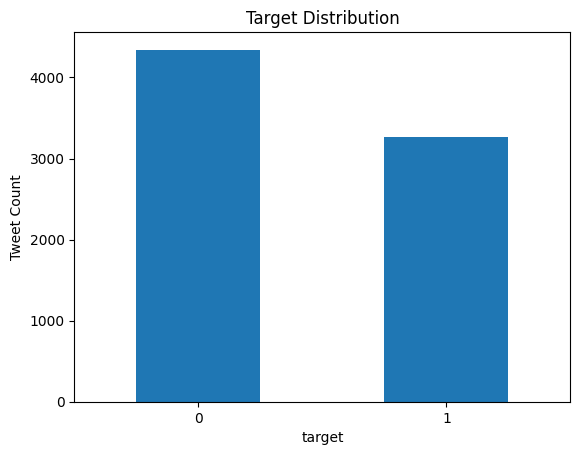

In [62]:
train_df.target.value_counts().plot(kind='bar')
plt.title("Target Distribution")
plt.ylabel("Tweet Count")
plt.xticks(rotation=360)

### Test Dataset

In [45]:
test_df = pd.read_csv("../NLP/data/test.csv")
test_df.head()


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [46]:
test_df.shape

(3263, 4)

### Summary:
##### Train Dataset
- The training contains 5 columns and 7,613 tweets.
- There was no duplicates
- Our columns are the appropriate data type

##### Test Dataset
- The testing dataset contains all the columns as the training set except for the target column.
- We have 4 columns and 3,263 tweets
- There is no duplicates 

Overall, it appears that our dataset is pretty small with only about 10k tweets. 7k off them are for the training dataset and the remainding 3k are allocated to our testing model. It appears that our `text` column contains a lot of special characters which might make it difficult for our model to learn. The goal is to correctly classify our tweets so we will need to drop the `location` column and omit some of the special characters. 

# Exploratory Data Analysis